# Data Analysis in 7 Enzyme 24 Species

Calculate sequence and structure similarity (identity and RMSD)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

from pymol import cmd, CmdException
from Bio import pairwise2
from Bio.Align import substitution_matrices

In [3]:
# import dataframe
overall_df = pd.read_csv("overall_results.csv")
overall_df.columns

Index(['index', 'species', 'name', 'EC number', 'sequence'], dtype='object')

In [3]:
# Calculate RMSD
# you need to download the Predicted structure database of 7 key enzymes in the central carbon metabolism among extended 12 archaeal and 12 bacterial strains
# https://zenodo.org/record/6387901#.Yu15YHYzaUk
index_total = overall_df.shape[0]
ali_RMSD_mat = np.zeros((index_total,index_total))
ali_strc_mat = np.zeros((index_total,index_total))


start_time = time.time()

for index in range(index_total):
    print("\rRMSD calculation of index: %d"%index,end="")
    protein_index = "SPC_%d"%(index+1)
    for index2 in range(index+1,index_total):
        protein_index2 = "SPC_%d"%(index2+1)
        try:
            cmd.load("SPC_summary/%s/unrelaxed_model_1_ptm.pdb"%protein_index,"Query")
        except:
            cmd.load("SPC_summary/%s/unrelaxed_model_1.pdb"%protein_index,"Query")
        try:
            cmd.load("SPC_summary/%s/unrelaxed_model_1_ptm.pdb"%protein_index2,"Iterate")
        except:
            cmd.load("SPC_summary/%s/unrelaxed_model_1.pdb"%protein_index2,"Iterate")
        align_para = cmd.align("Query","Iterate",cycles=5)
        ali_RMSD_mat[index,index2] = align_para[0]
        ali_RMSD_mat[index2,index] = align_para[0]
        ali_strc_mat[index,index2] = align_para[6]
        ali_strc_mat[index2,index] = align_para[6]
        cmd.reinitialize()

end_time = time.time() - start_time
print("\nTotal timing: ",end_time)

RMSD calculation of index: 0 PyMOL not running, entering library mode (experimental)
RMSD calculation of index: 176
Total timing:  652.9632742404938


In [4]:
index_total = overall_df.shape[0]
seq_iden_mat = np.ones((index_total,index_total))

blosum62 = substitution_matrices.load("BLOSUM62")
for i in range(index_total):
    print("\rSequence alignment of index: %d"%(i+1),end="")
    seq1 = overall_df["sequence"][i].replace(" ","")
    for j in range(i+1,index_total):
        seq2 = overall_df["sequence"][j].replace(" ","")
        match = pairwise2.align.globalxx(seq1,seq2)[0]
        match_count = match.score
        match_len = match.end
        seq_iden_mat[i][j] = match_count/match_len
        seq_iden_mat[j][i] = match_count/match_len
        

Sequence alignment of index: 177

In [5]:
EC_list = ["1.2.7.11","2.7.2.3","4.2.1.11","1.2.1.59","5.3.1.1","5.4.2.12","2.7.1.40"]

for EC_number in EC_list:
    plt.imshow(ali_RMSD_mat[overall_df[overall_df["EC number"] == EC_number].index][:,overall_df[overall_df["EC number"] == EC_number].index],vmin=0,vmax=6)
    plt.colorbar()
    plt.title("RMSD: %s"%EC_number)
    plt.savefig("RMSD_heat_%s.png"%EC_number)
    plt.close()

In [6]:
EC_list = ["1.2.7.11","2.7.2.3","4.2.1.11","1.2.1.59","5.3.1.1","5.4.2.12","2.7.1.40"]

for EC_number in EC_list:
    plt.imshow(seq_iden_mat[overall_df[overall_df["EC number"] == EC_number].index][:,overall_df[overall_df["EC number"] == EC_number].index],vmin=0.3,vmax=0.7,cmap="viridis_r")
    plt.colorbar()
    plt.title("Sequence Identity: %s"%EC_number)
    plt.savefig("seq_heat_%s.png"%EC_number)
    plt.close()

In [7]:
EC_list = ["1.2.7.11","2.7.2.3","4.2.1.11","1.2.1.59","5.3.1.1","5.4.2.12","2.7.1.40"]

for EC_number in EC_list:
    plt.figure(figsize=(12,12))
    plt.imshow(ali_RMSD_mat[overall_df[overall_df["EC number"] == EC_number].index][:,overall_df[overall_df["EC number"] == EC_number].index],vmin=0,vmax=6)
    plt.xticks(np.arange(0,overall_df[overall_df["EC number"] == EC_number].shape[0],1),overall_df[overall_df["EC number"] == EC_number]["name"],rotation=90)
    plt.yticks(np.arange(0,overall_df[overall_df["EC number"] == EC_number].shape[0],1),overall_df[overall_df["EC number"] == EC_number]["name"])
    plt.colorbar(shrink=0.7)
    plt.title("RMSD: %s"%EC_number)
    plt.tight_layout()
    plt.savefig("RMSD_heat_%s.png"%EC_number)
    plt.close()

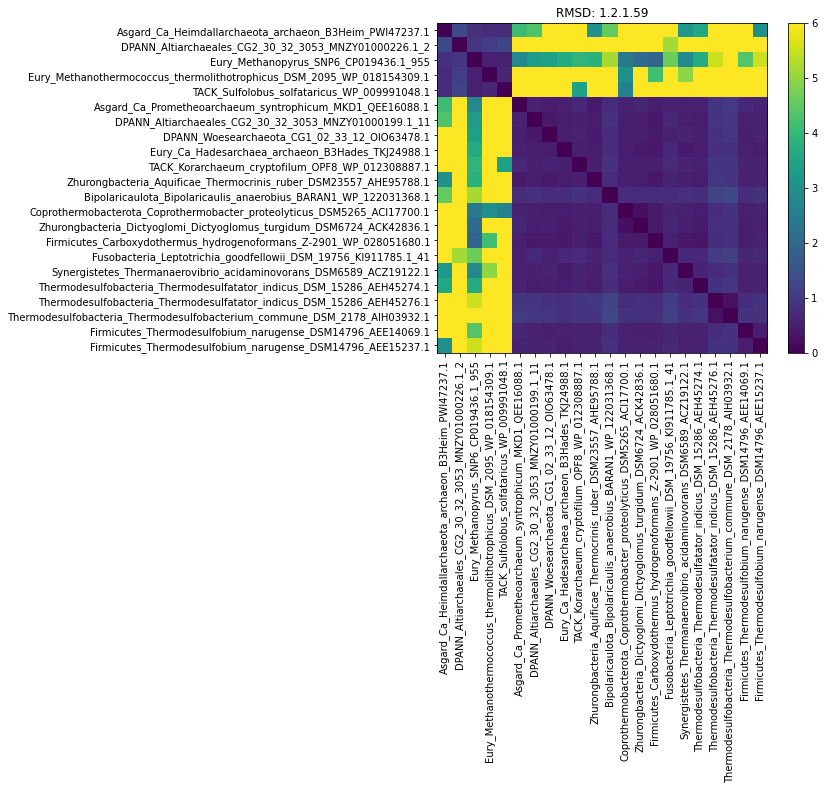

In [8]:
EC_number = "1.2.1.59"
index_list = [1,19,37,45,73,8,18,25,28,54,79,88,96,105,112,117,125,130,131,139,145,151]
plt.figure(figsize=(12,12))
plt.imshow(ali_RMSD_mat[index_list][:,index_list],vmin=0,vmax=6)
plt.xticks(np.arange(0,len(index_list),1),overall_df["name"][index_list],rotation=90)
plt.yticks(np.arange(0,len(index_list),1),overall_df["name"][index_list])
plt.colorbar(shrink=0.7)
plt.title("RMSD: %s"%EC_number)
plt.tight_layout()
plt.savefig("RMSD_test_%s.png"%EC_number)


In [9]:
print(len(overall_df[overall_df["EC number"] == EC_number].index))
len([1,19,37,45,73,8,18,25,28,54,79,88,96,105,112,117,125,130,131,139,145,151])

25


22

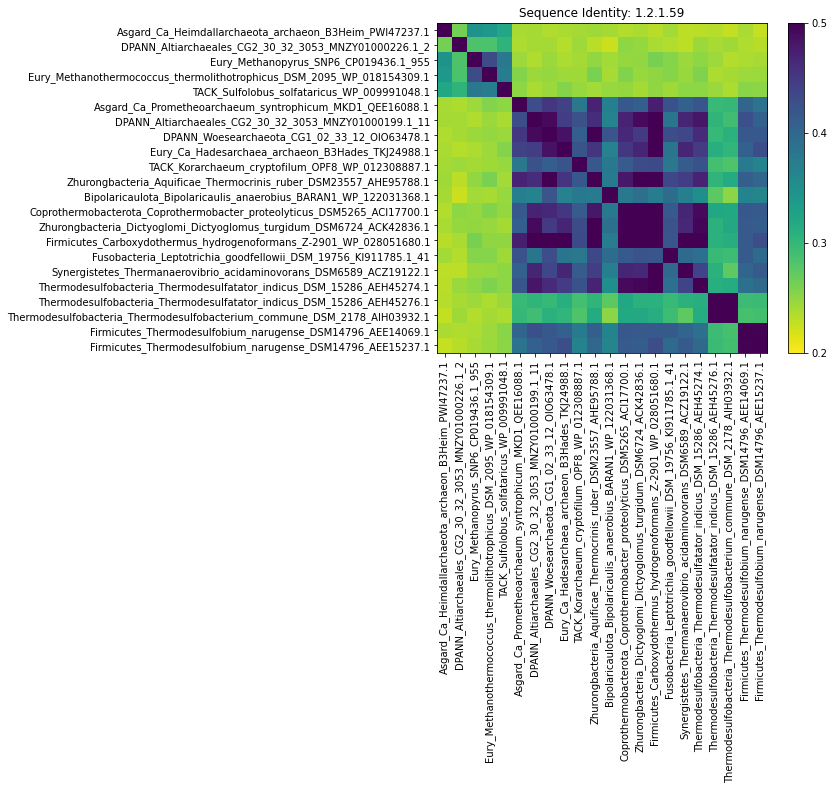

In [10]:
EC_number = "1.2.1.59"
index_list = [1,19,37,45,73,8,18,25,28,54,79,88,96,105,112,117,125,130,131,139,145,151]
plt.figure(figsize=(12,12))
plt.imshow(seq_iden_mat[index_list][:,index_list],vmin=0.2,vmax=0.5,cmap="viridis_r")
plt.xticks(np.arange(0,len(index_list),1),overall_df["name"][index_list],rotation=90)
plt.yticks(np.arange(0,len(index_list),1),overall_df["name"][index_list])
plt.colorbar(shrink=0.7,ticks=np.arange(0,1,0.1))
plt.title("Sequence Identity: %s"%EC_number)
plt.tight_layout()
plt.savefig("seq_test_%s.png"%EC_number)


In [11]:
np.savetxt("data/ali_RMSD_mat.txt", ali_RMSD_mat)
np.savetxt("data/ali_strc_mat.txt", ali_strc_mat)
np.savetxt("data/seq_iden_mat.txt", seq_iden_mat)

In [12]:
np.savetxt("data/seq_iden_mat.txt", seq_iden_mat)